# EDA: Fase de Analisis Exploratorio de Datos

### Una vez realizado el proceso de ETL donde se pudo realizar la limpieza de los datos, tales como: la correccion de datos (Valores faltantes, eliminacion de duplicados, reemplazar valores), verificar la estructura de los datos y revisar la calidad de estos mismos. Se plantea dar inicio a la siguiente fase, que vendria siendo el EDA, esto en función a unos objetivos y preguntas planteadas que nos conduzcan a explorar y buscar patrones o tendencias que apoyen nuestros KPIs.
---

In [1]:
# Iniciamos importando las librerias necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Para nuestro primer KPI: Aumentar en un 2% el acceso a Internet por cada 100 hogares, por provincia, para el próximo trimestre.

Lo definimos de la siguiente manera:
$KPI = \left(\frac{\text{Nuevo acceso} - \text{Acceso actual}}{\text{Acceso actual}}\right) \times 100$

### Se tomo la consideracion de utilizar como informacion los siguientes dataframes
---

##### Carga y Exploracion de los datos

In [2]:
# Carga de los datasets
accesos_por_tecnologia = pd.read_csv('./CSVs/kpi_1/accesos_por_tecnologia.csv')
accesos_tecnologia_localidad = pd.read_csv('./CSVs/kpi_1/accesos_tecnologia_localidad.csv')
penetracion_hogares = pd.read_csv('./CSVs/kpi_1/penetracion_hogares.csv')

In [3]:
# Previsualizacion del dataframe
penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2014,1,Buenos Aires,54.570073
1,2014,1,Capital Federal,112.254123
2,2014,1,Catamarca,24.251751
3,2014,1,Chaco,20.718539
4,2014,1,Chubut,41.235218


In [4]:
# Ver el tamaño del dataset
print("Dimensiones del dataset:", penetracion_hogares.shape)

Dimensiones del dataset: (1000, 4)


In [5]:
# Verificar datos faltantes y tipo de datos
penetracion_hogares.info()
penetracion_hogares.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

##### Analisis descriptivo por provincia

In [ ]:
# Calcular el promedio de acceso por provincia
acceso_provincia = penetracion_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].mean()

# Mostrar el resultado
acceso_provincia

Provincia
Buenos Aires            66.297052
Capital Federal        114.247268
Catamarca               41.213171
Chaco                   34.976478
Chubut                  57.641113
Cordoba                 70.302257
Corrientes              37.966266
Entre Rios              53.520019
Formosa                 28.366984
Jujuy                   39.058077
La Pampa                75.274059
La Rioja                47.911722
Mendoza                 39.383300
Misiones                38.424972
Neuquen                 64.792858
Rio Negro               55.887574
Salta                   44.413094
San Juan                36.177096
San Luis                53.101202
Santa Cruz              36.440179
Santa Fe                65.653919
Santiago Del Estero     35.329141
Tierra Del Fuego        83.377666
Tucuman                 46.822820
Name: Accesos por cada 100 hogares, dtype: float64

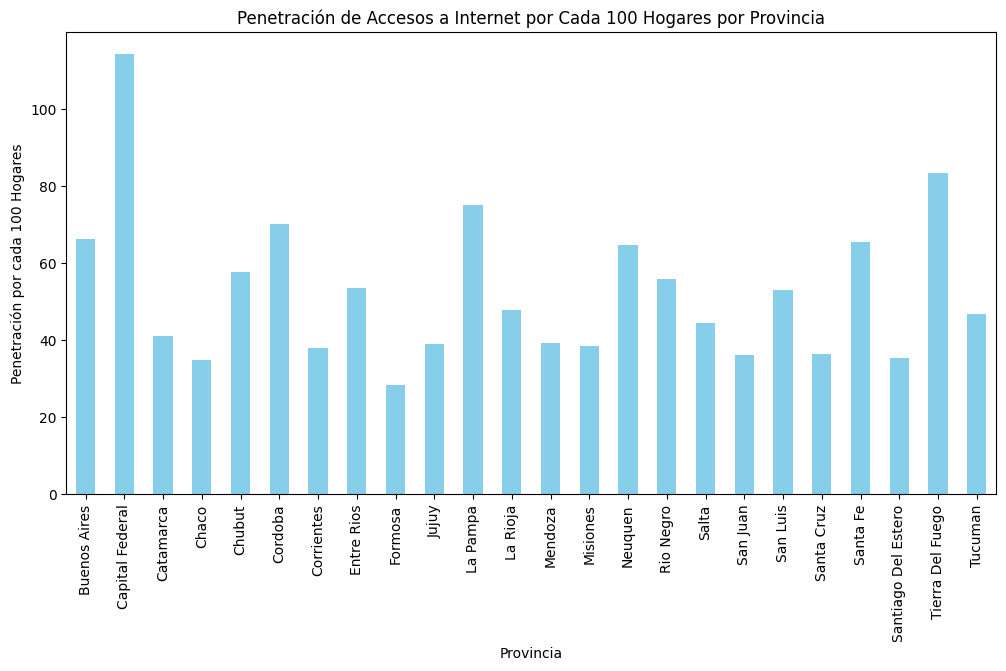

In [ ]:
# Visualizar la penetración por provincia
acceso_provincia.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Promedio de Accesos a Internet por Cada 100 Hogares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 Hogares')
plt.xticks(rotation=90)
plt.show()

###### En el siguiente grafico podemos ver el promedio de accesos por provincia a lo largo del historico de la data, cabe destacar que se puede visualizar un conjunto de provincias que estan por debajo de los 40 accesos por cada 100 hogares.

##### Analisis de tendencias anuales

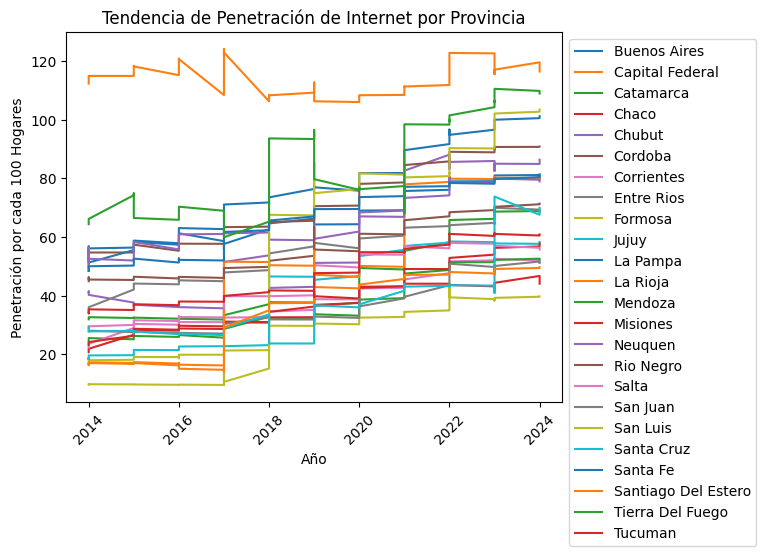

In [8]:
# Crear una gráfica de tendencias anuales
for provincia in penetracion_hogares['Provincia'].unique():
    data_provincia = penetracion_hogares[penetracion_hogares['Provincia'] == provincia]
    plt.plot(data_provincia['Año'], data_provincia['Accesos por cada 100 hogares'], label=provincia)

plt.title('Tendencia de Penetración de Internet por Provincia')
plt.xlabel('Año')
plt.ylabel('Penetración por cada 100 Hogares')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()


###### En el grafico de arriba podemos apreciar como ha sido el crecimiento de accesos por provincia a lo largo del historico de la data (2014-2024). Se puede apreciar que las provincias a nivel general poseen la misma pendiente de crecimiento, sin embargo algunas de ellas poseen en promedio menor cantidad de accesos por cada 100 hogares que las provincias con mayor densidad poblacional

##### Comparaciones

In [9]:
accesos_tecnologia_localidad.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,Buenos Aires,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,Buenos Aires,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,Buenos Aires,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,Buenos Aires,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,Buenos Aires,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


In [10]:
penetracion_tecnologia = accesos_tecnologia_localidad.groupby(['Provincia','Tecnologia'])['Accesos'].sum().unstack()

In [11]:
penetracion_tecnologia

Tecnologia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
Provincia,,,,,,,,
Buenos Aires,214055.0,2722466.0,5900.0,1849476.0,56102.0,1061.0,1682.0,138638.0
Caba,54102.0,1144781.0,2050.0,230402.0,27704.0,67.0,NaN,4493.0
Catamarca,4951.0,10303.0,1.0,58355.0,1.0,79.0,NaN,1384.0
Chaco,9448.0,57935.0,5.0,68944.0,2277.0,76.0,NaN,8407.0
Chubut,25955.0,80704.0,857.0,26516.0,8906.0,167.0,NaN,31118.0
Cordoba,93483.0,443091.0,63.0,477504.0,9305.0,95.0,71.0,62162.0
Corrientes,14849.0,86226.0,3.0,39792.0,5175.0,77.0,59.0,10295.0
Entre Rios,31335.0,158918.0,20.0,68540.0,11297.0,24.0,224.0,23954.0
Formosa,8488.0,18768.0,NaN,18977.0,234.0,53.0,NaN,16430.0


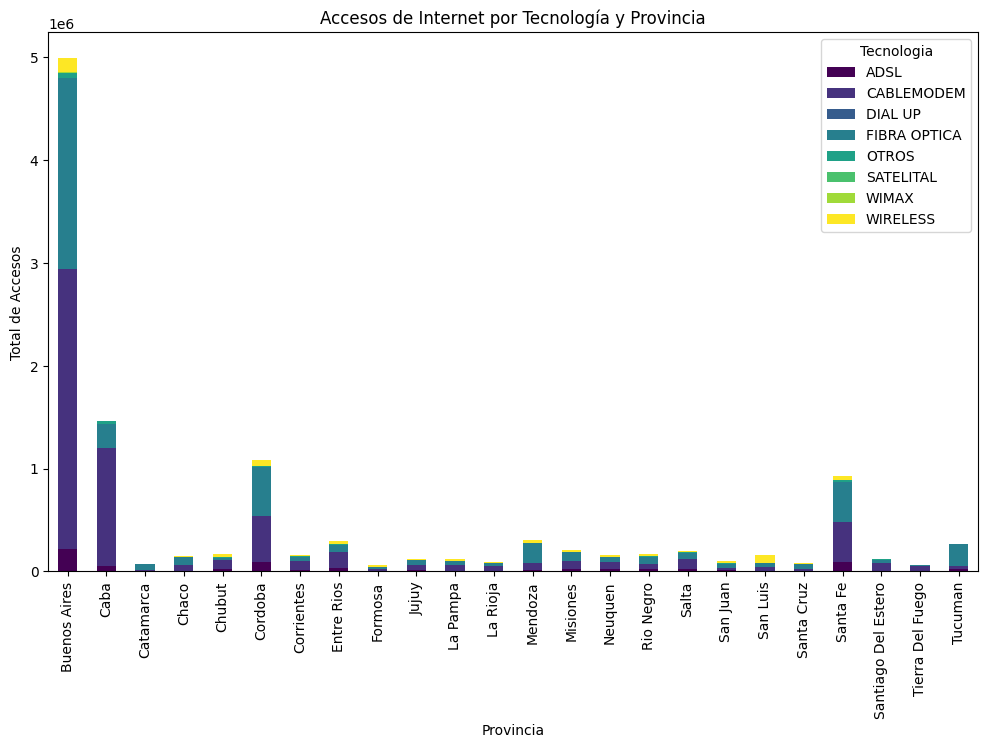

In [12]:
# Visualización de accesos por tecnología en cada provincia
penetracion_tecnologia.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Accesos de Internet por Tecnología y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Total de Accesos')
plt.xticks(rotation=90)
plt.show()

###### En el grafico se puede apreciar la distribucion de los accesos en base al tipo de tecnologia por provincia. Se podria sugerir una mayor adopcion de tecnologias avanzadas para mejorar la cantidad de accesos en la provincias con menor cantidad.

In [17]:
# Calcular el crecimiento porcentual trimestral de la penetración por provincia
penetracion_hogares['Crecimiento_Trimestral'] = penetracion_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].pct_change() * 100

# Filtrar las provincias con menor crecimiento o crecimiento negativo
provincias_bajo_crecimiento = penetracion_hogares[penetracion_hogares['Crecimiento_Trimestral'] < 2]

provincias_bajo_crecimiento[['Provincia', 'Trimestre', 'Accesos por cada 100 hogares', 'Crecimiento_Trimestral']]

,Provincia,Trimestre,Accesos por cada 100 hogares,Crecimiento_Trimestral
16,Buenos Aires,2,55.061417,0.900391
17,Capital Federal,2,113.143352,0.792158
18,Catamarca,2,24.703119,1.861175
19,Chaco,2,20.957996,1.155764
20,Chubut,2,41.410210,0.424374
...,...,...,...,...
994,San Luis,2,103.400000,0.681597
996,Santa Fe,2,81.340000,1.169154
997,Santiago Del Estero,2,49.670000,0.526209
998,Tierra Del Fuego,2,108.890000,-0.810712


### Para nuestro segundo KPI: Incrementar la velocidad media de bajada en Mbps en un 5% por provincia para el siguiente trimestre.

Lo definimos de la siguienta manera: $KPI = \left(\frac{\text{Nueva velocidad} - \text{Velocidad actual}}{\text{Velocidad actual}}\right) \times 100$

### Se tomo la consideracion de utilizar como informacion los siguientes dataframes
---

##### Carga y Exploracion de los datos

In [18]:
# Carga de los datasets
totales_vmd = pd.read_csv('./CSVs/kpi_2/totales_vmd.csv')
velocidad_porcentual_por_prov = pd.read_csv('./CSVs/kpi_2/velocidad_%_por_prov.csv')
velocidad_sin_rangos = pd.read_csv('./CSVs/kpi_2/velocidad_sin_rangos.csv')

In [19]:
# Inspeccionar las primeras filas
print(velocidad_sin_rangos.head())
print(velocidad_porcentual_por_prov.head())
print(totales_vmd.head())

    Año  Trimestre     Provincia  Velocidad (Mbps)  Accesos
0  2017          4  Buenos Aires             0.256   114182
1  2017          4  Buenos Aires             0.512     3865
2  2017          4  Buenos Aires             1.000    35185
3  2017          4  Buenos Aires             1.200    19861
4  2017          4  Buenos Aires             2.200    29124
    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2014          1     Buenos Aires                3.733133
1  2014          1  Capital Federal                4.024082
2  2014          1        Catamarca                2.802734
3  2014          1            Chaco                3.255837
4  2014          1           Chubut                3.175917
    Año  Trimestre  Mbps (Media de bajada)
0  2014          1                3.617127
1  2014          2                3.758712
2  2014          3                3.867265
3  2014          4                4.156888
4  2015          1                4.350279


In [20]:
# Revisar información general
print(velocidad_sin_rangos.info())
print(velocidad_porcentual_por_prov.info())
print(totales_vmd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               18884 non-null  int64  
 1   Trimestre         18884 non-null  int64  
 2   Provincia         18884 non-null  object 
 3   Velocidad (Mbps)  18884 non-null  float64
 4   Accesos           18884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 737.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB
None
<c

In [21]:
# Revisar valores nulos
print(velocidad_sin_rangos.isnull().sum())
print(velocidad_porcentual_por_prov.isnull().sum())
print(totales_vmd.isnull().sum())

Año                 0
Trimestre           0
Provincia           0
Velocidad (Mbps)    0
Accesos             0
dtype: int64
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64
Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
dtype: int64


##### Analisis descriptivo

In [22]:
# Calcular la media de velocidad de bajada por provincia
velocidad_media_provincia = velocidad_porcentual_por_prov.groupby('Provincia')['Mbps (Media de bajada)'].mean()

In [23]:
velocidad_media_provincia

Provincia
Buenos Aires           44.001793
Capital Federal        63.331718
Catamarca              29.836084
Chaco                  32.950653
Chubut                  8.194332
Cordoba                35.077366
Corrientes             29.335323
Entre Rios             27.630180
Formosa                23.286574
Jujuy                  17.209240
La Pampa                9.291688
La Rioja               20.795860
Mendoza                14.867812
Misiones               28.901830
Neuquen                31.061871
Rio Negro              22.761132
Salta                  25.512269
San Juan                8.850697
San Luis               28.983817
Santa Cruz              8.408294
Santa Fe               29.291080
Santiago Del Estero    13.205255
Tierra Del Fuego        7.989261
Tucuman                32.511764
Name: Mbps (Media de bajada), dtype: float64

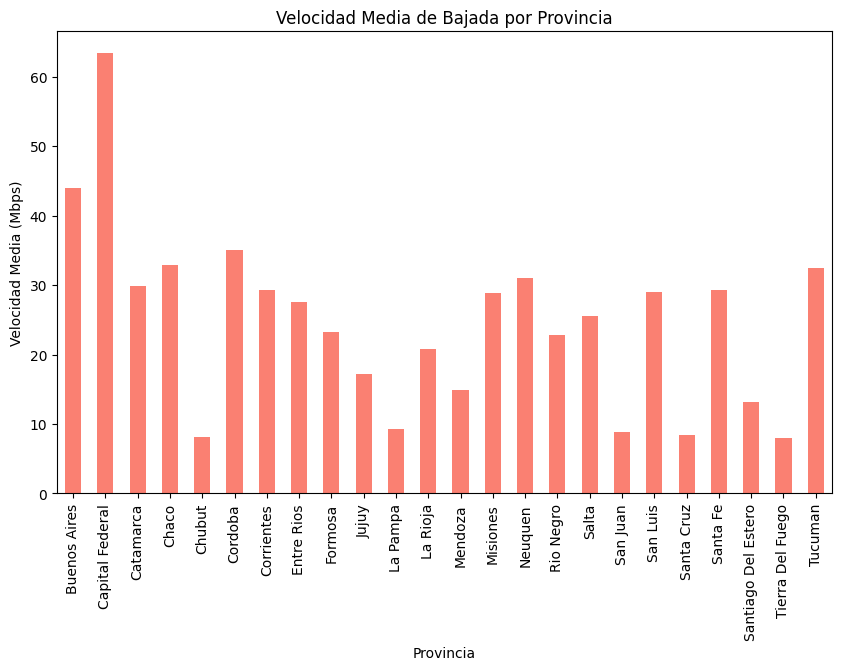

In [24]:
# Visualizar el promedio de velocidad media por provincia
velocidad_media_provincia.plot(kind='bar', color='salmon', figsize=(10, 6))
plt.title('Velocidad Media de Bajada por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Media (Mbps)')
plt.xticks(rotation=90)
plt.show()

###### El grafico representa la velocidad media de bajada por provincia y busca verificar las variaciones. Esto nos permite detectar provincias con velocidades bajas que necesitan mayor atencion para mejorar la experiencia de usuario

##### Analisis de tendencias por año

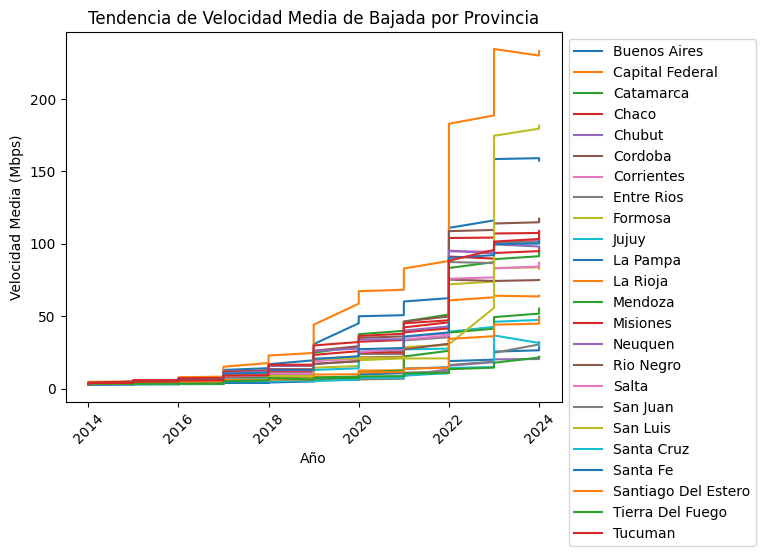

In [25]:
# Graficar tendencia de velocidad por trimestre en cada provincia
for provincia in velocidad_porcentual_por_prov['Provincia'].unique():
    data_provincia = velocidad_porcentual_por_prov[velocidad_porcentual_por_prov['Provincia'] == provincia]
    plt.plot(data_provincia['Año'], data_provincia['Mbps (Media de bajada)'], label=provincia)

plt.title('Tendencia de Velocidad Media de Bajada por Provincia')
plt.xlabel('Año')
plt.ylabel('Velocidad Media (Mbps)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

###### El grafico superior nos permite identificar areas donde el crecimiento es bajo y donde deberiamos enfocar los esfuerzos para lograr la meta del KPI. Es importante mencionar que encontramos que las provincias con menor cantidad de accesos por cada 100 hogares presentan velocidades medias de bajada por debajo del promedio nacional

In [34]:
# Calcular el crecimiento porcentual de la velocidad media por trimestre para cada provincia
velocidad_porcentual_por_prov['Crecimiento_Anual'] = velocidad_porcentual_por_prov.groupby('Provincia')['Mbps (Media de bajada)'].pct_change() * 100

# Filtrar provincias con bajo crecimiento
provincias_bajo_crecimiento = velocidad_porcentual_por_prov[velocidad_porcentual_por_prov['Crecimiento_Anual'] < 5]

provincias_bajo_crecimiento[['Provincia', 'Año', 'Mbps (Media de bajada)', 'Crecimiento_Anual']]


,Provincia,Año,Mbps (Media de bajada),Crecimiento_Anual
24,Buenos Aires,2014,3.851863,3.180438
26,Catamarca,2014,2.915358,4.018362
28,Chubut,2014,3.156405,-0.614356
30,Corrientes,2014,3.366971,4.608972
31,Entre Rios,2014,3.312400,4.581526
...,...,...,...,...
1000,Salta,2024,87.030000,3.189471
1002,San Luis,2024,181.610000,1.181124
1003,Santa Cruz,2024,29.890000,-5.411392
1004,Santa Fe,2024,102.510000,2.305389


### Para nuestro tercer KPI: Incrementar en un 4% los ingresos trimestrales totales por cada millón de accesos en tecnologías avanzadas (Cablemodem, Fibra óptica) en el próximo trimestre al nivel nacional.

Lo definimos de la siguiente manera: $KPI = \left(\frac{\text{Nuevo ingreso} - \text{Ingreso actual}}{\text{Ingreso actual}}\right) \times 100$

### Se tomo la consideracion de utilizar como informacion los siguientes dataframes
---

##### Carga y Exploracion de los datos

In [35]:
# Carga de los datasets
accesos_por_tecnologia = pd.read_csv('./CSVs/kpi_3/accesos_por_tecnologia.csv')
accesos_tecnologia_localidad = pd.read_csv('./CSVs/kpi_3/accesos_tecnologia_localidad.csv')
totales_accesos_por_tecnologia = pd.read_csv('./CSVs/kpi_3/totales_accesos_por_tecnologia.csv')
ingresos = pd.read_csv('./CSVs/kpi_3/ingresos.csv')

In [36]:
#Inspeccionar las primeras filas
print(totales_accesos_por_tecnologia.head())
print(ingresos.head())

    Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless  Otros  \
0  2014          1  3697066     2407330        150323     70749  72930   
1  2014          2  3708882     2461670        149363     72405  72148   
2  2014          3  3714764     2569868        155494     85096  70049   
3  2014          4  3764038     2536219        149682     76984  71573   
4  2015          1  3756153     2668248        168188     79098  66045   

     Total        Periodo  
0  6398398   Ene-Mar 2014  
1  6464468   Abr-Jun 2014  
2  6595271  Jul-Sept 2014  
3  6598496   Oct-Dic 2014  
4  6737732   Ene-Mar 2015  
    Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2014          1               2.984054e+06   Ene-Mar 2014
1  2014          2               3.270816e+06   Abr-Jun 2014
2  2014          3               3.478638e+06  Jul-Sept 2014
3  2014          4               3.950441e+06   Oct-Dic 2014
4  2015          1               4.876385e+06   Ene-Mar 2015


In [37]:
# Verificar información general
print(totales_accesos_por_tecnologia.info())
print(ingresos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64

In [38]:
# Verificar valores nulos
print(totales_accesos_por_tecnologia.isnull().sum())
print(ingresos.isnull().sum())

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64


In [ ]:
# Se combinaron las tablas en un único DataFrame usando Año y Trimestre como claves
df_merged = pd.merge(totales_accesos_por_tecnologia, ingresos, on=['Año', 'Trimestre'])

In [ ]:
# Se calcularon los accesos totales en tecnologías avanzadas (Cablemodem y Fibra óptica)
df_merged['Accesos_Tecnologia_Avanzada'] = df_merged['Cablemodem'] + df_merged['Fibra óptica']

In [41]:
df_merged.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo_x,Ingresos (miles de pesos),Periodo_y,Accesos_Tecnologia_Avanzada
0,2014,1,3697066,2407330,150323,70749,72930,6398398,Ene-Mar 2014,2.984054e+06,Ene-Mar 2014,2557653
1,2014,2,3708882,2461670,149363,72405,72148,6464468,Abr-Jun 2014,3.270816e+06,Abr-Jun 2014,2611033
2,2014,3,3714764,2569868,155494,85096,70049,6595271,Jul-Sept 2014,3.478638e+06,Jul-Sept 2014,2725362
3,2014,4,3764038,2536219,149682,76984,71573,6598496,Oct-Dic 2014,3.950441e+06,Oct-Dic 2014,2685901
4,2015,1,3756153,2668248,168188,79098,66045,6737732,Ene-Mar 2015,4.876385e+06,Ene-Mar 2015,2836436


In [ ]:
# Se procedio a eliminar las columnas innecesarias
df_merged.drop(columns=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total', 'Periodo_y'], inplace=True)

In [43]:
df_merged.head()

,Año,Trimestre,Periodo_x,Ingresos (miles de pesos),Accesos_Tecnologia_Avanzada
0,2014,1,Ene-Mar 2014,2.984054e+06,2557653
1,2014,2,Abr-Jun 2014,3.270816e+06,2611033
2,2014,3,Jul-Sept 2014,3.478638e+06,2725362
3,2014,4,Oct-Dic 2014,3.950441e+06,2685901
4,2015,1,Ene-Mar 2015,4.876385e+06,2836436


In [ ]:
# Se calcularon los ingresos por cada millón de accesos en tecnologías avanzadas
df_merged['Ingresos_por_Millon_Accesos'] = df_merged['Ingresos (miles de pesos)'] / (df_merged['Accesos_Tecnologia_Avanzada'] / 1_000_000)

In [45]:
df_merged.head()

,Año,Trimestre,Periodo_x,Ingresos (miles de pesos),Accesos_Tecnologia_Avanzada,Ingresos_por_Millon_Accesos
0,2014,1,Ene-Mar 2014,2.984054e+06,2557653,1.166716e+06
1,2014,2,Abr-Jun 2014,3.270816e+06,2611033,1.252690e+06
2,2014,3,Jul-Sept 2014,3.478638e+06,2725362,1.276395e+06
3,2014,4,Oct-Dic 2014,3.950441e+06,2685901,1.470807e+06
4,2015,1,Ene-Mar 2015,4.876385e+06,2836436,1.719195e+06


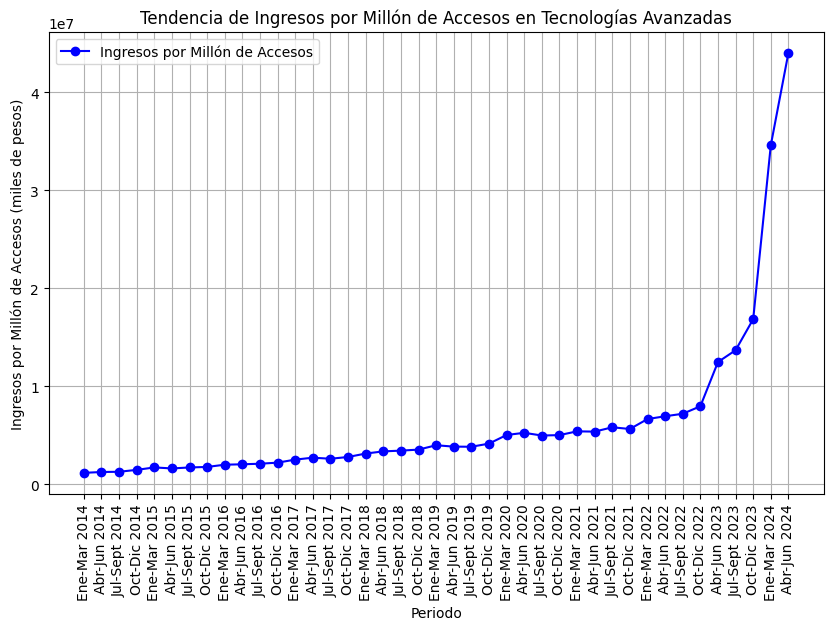

In [ ]:
# Análisis de tendencia
plt.figure(figsize=(10, 6))
plt.plot(df_merged['Periodo_x'], df_merged['Ingresos_por_Millon_Accesos'], marker='o', color='b', label='Ingresos por Millón de Accesos')
plt.xlabel('Periodo')
plt.ylabel('Ingresos por Millón de Accesos (miles de pesos)')
plt.title('Tendencia de Ingresos por Millón de Accesos en Tecnologías Avanzadas')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

###### En el siguiente grafico podemos observar la pendiente de los ingresos con respecto al transcurso del tiempo, denotando un incremento exponencial a partir del año 2023. Sin embargo, este dato debe ser considerado en contexto: los ingresos han estado sujetos a fluctuaciones anuales debido a factores como la inflación.

In [ ]:
# Se Aplico el cálculo de crecimiento intertrimestral
df_merged['Crecimiento_Ingresos_por_Millon'] = df_merged['Ingresos_por_Millon_Accesos'].pct_change() * 100  # porcentaje de crecimiento

# Ver los resultados
df_merged[['Año', 'Trimestre', 'Ingresos_por_Millon_Accesos', 'Crecimiento_Ingresos_por_Millon']]


,Año,Trimestre,Ingresos_por_Millon_Accesos,Crecimiento_Ingresos_por_Millon
0,2014,1,1.166716e+06,NaN
1,2014,2,1.252690e+06,7.368947
2,2014,3,1.276395e+06,1.892268
3,2014,4,1.470807e+06,15.231323
4,2015,1,1.719195e+06,16.887877
5,2015,2,1.617329e+06,-5.925186
6,2015,3,1.716273e+06,6.117758
7,2015,4,1.770223e+06,3.143435
8,2016,1,1.998446e+06,12.892339
9,2016,2,2.039999e+06,2.079263


In [48]:
df_merged.head()

,Año,Trimestre,Periodo_x,Ingresos (miles de pesos),Accesos_Tecnologia_Avanzada,Ingresos_por_Millon_Accesos,Crecimiento_Ingresos_por_Millon
0,2014,1,Ene-Mar 2014,2.984054e+06,2557653,1.166716e+06,NaN
1,2014,2,Abr-Jun 2014,3.270816e+06,2611033,1.252690e+06,7.368947
2,2014,3,Jul-Sept 2014,3.478638e+06,2725362,1.276395e+06,1.892268
3,2014,4,Oct-Dic 2014,3.950441e+06,2685901,1.470807e+06,15.231323
4,2015,1,Ene-Mar 2015,4.876385e+06,2836436,1.719195e+06,16.887877


In [ ]:
# Se procedio a calcular la correlación entre accesos y ingresos
correlation = df_merged['Accesos_Tecnologia_Avanzada'].corr(df_merged['Ingresos (miles de pesos)'])
print(f"Correlación entre accesos en tecnologías avanzadas e ingresos: {correlation:.2f}")

Correlación entre accesos en tecnologías avanzadas e ingresos: 0.70


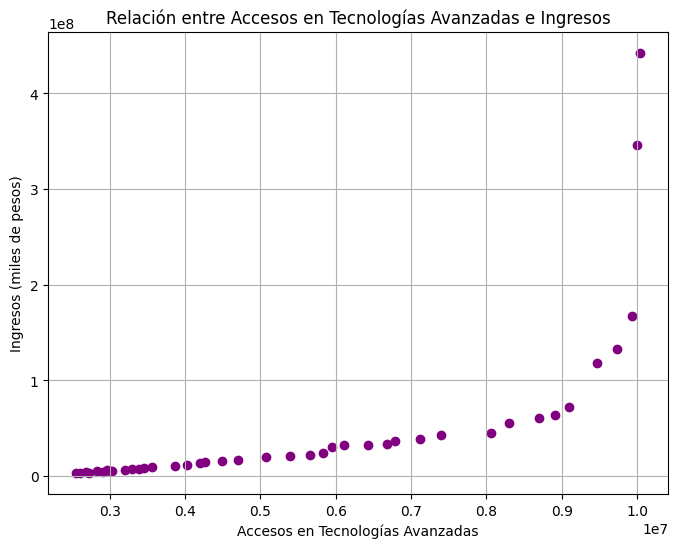

In [ ]:
# Visualización de la correlación
plt.figure(figsize=(8, 6))
plt.scatter(df_merged['Accesos_Tecnologia_Avanzada'], df_merged['Ingresos (miles de pesos)'], color='purple')
plt.xlabel('Accesos en Tecnologías Avanzadas')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Relación entre Accesos en Tecnologías Avanzadas e Ingresos')
plt.grid()

###### A lo largo del tiempo, hemos observado una correlación lineal positiva entre el crecimiento de los accesos en tecnologías avanzadas y los ingresos generados. Es decir, a medida que aumentan los accesos en estas tecnologías, también lo hacen los ingresos.